In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
url = r"c:\Users\mjana\Music\Downloads\archive (17) (1)\2023_nba_player_stats.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [50]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [51]:
df.isnull().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [52]:
df.duplicated ().sum()

np.int64(0)

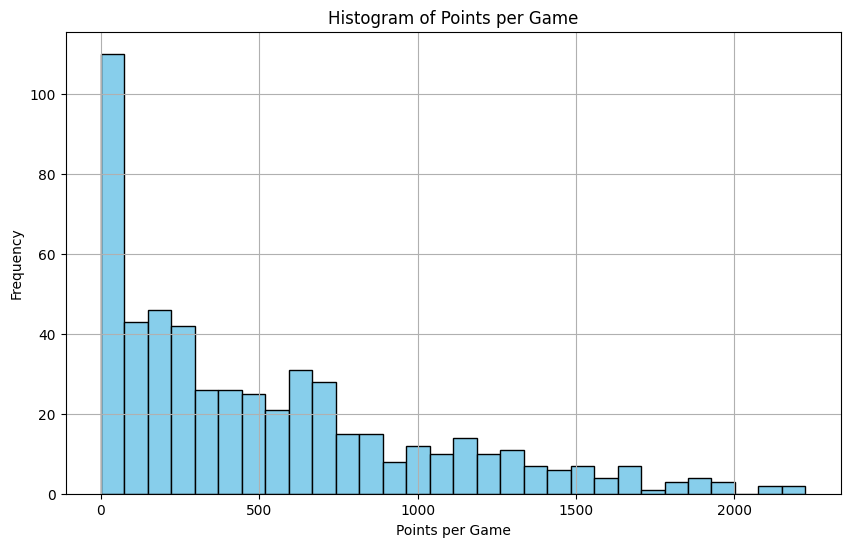

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(df['PTS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Points per Game')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\mjana\AppData\Local\Temp\ipykernel_28320\3112762904.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AST'], shade=True, color='purple')


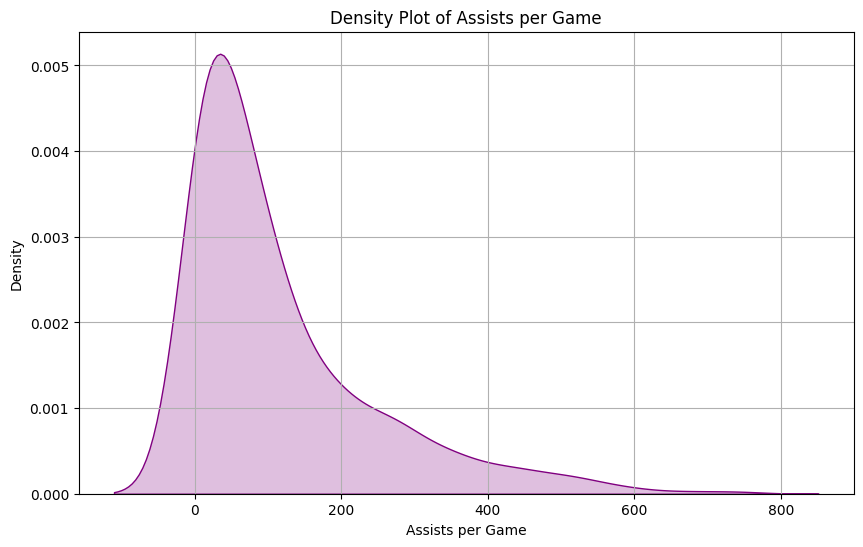

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AST'], shade=True, color='purple')
plt.title('Density Plot of Assists per Game')
plt.xlabel('Assists per Game')
plt.ylabel('Density')
plt.grid(True)
plt.show()


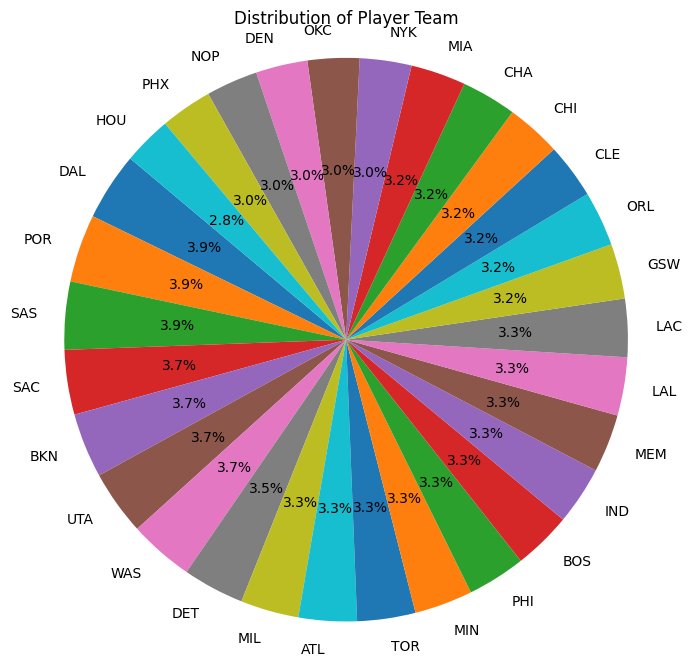

In [55]:
Team_counts = df['Team'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Team_counts, labels=Team_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Player Team')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


In [56]:
print(df.columns.tolist())

['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-']


C:\Users\mjana\AppData\Local\Temp\ipykernel_28320\631527849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='POS', y='PTS', data=df, palette='Set2')


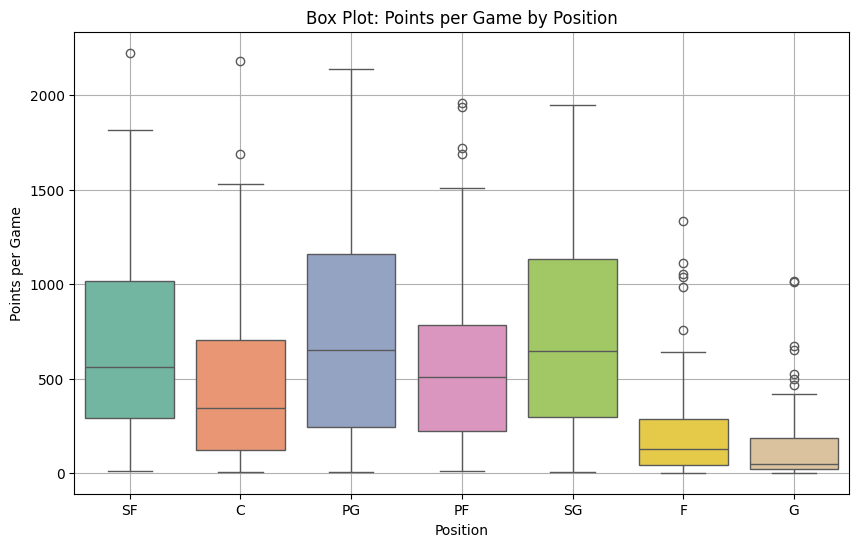

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='POS', y='PTS', data=df, palette='Set2')
plt.title('Box Plot: Points per Game by Position')
plt.xlabel('Position')
plt.ylabel('Points per Game')
plt.grid(True)
plt.show()


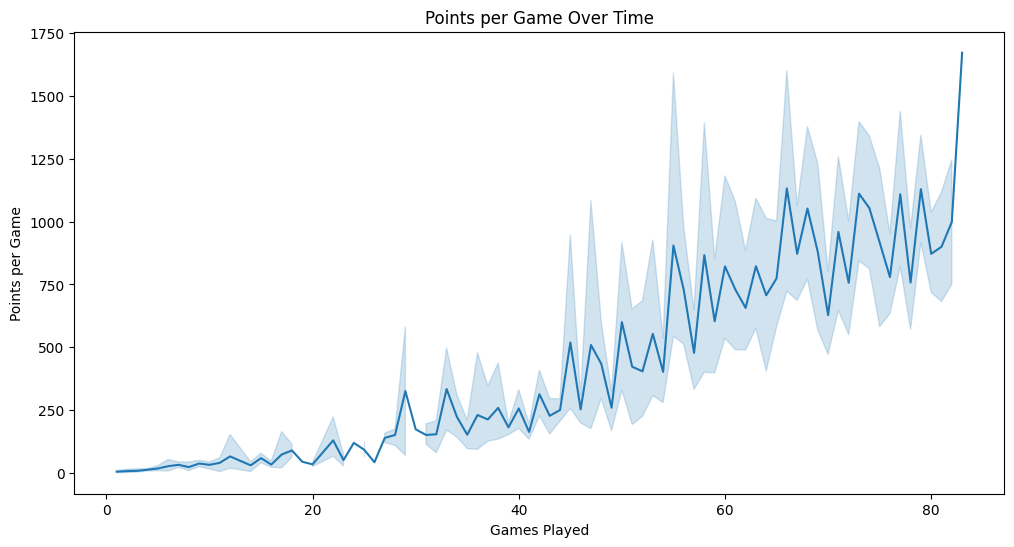

In [58]:
# If there's a date or year column, you can plot it over time (assuming we have 'Year' column in this case)
plt.figure(figsize=(12, 6))
sns.lineplot(x='GP', y='PTS', data=df)
plt.title('Points per Game Over Time')
plt.xlabel('Games Played')
plt.ylabel('Points per Game')
plt.show()


C:\Users\mjana\AppData\Local\Temp\ipykernel_28320\4230327884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='POS', order=df['POS'].value_counts().index, palette='Set2')


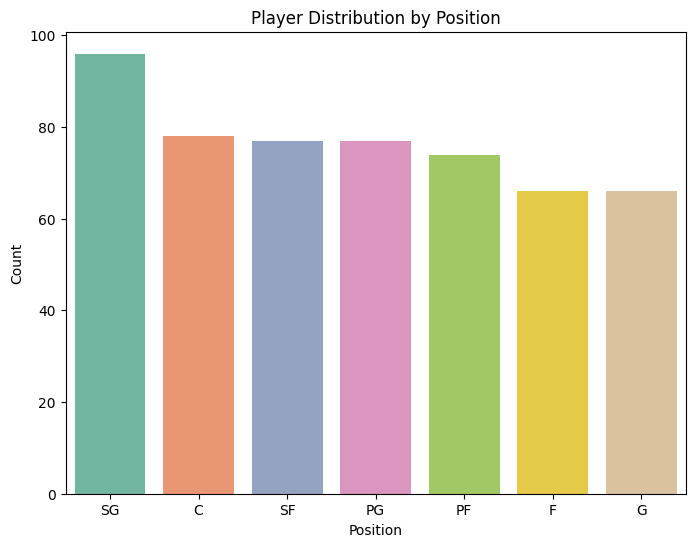

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='POS', order=df['POS'].value_counts().index, palette='Set2')
plt.title('Player Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

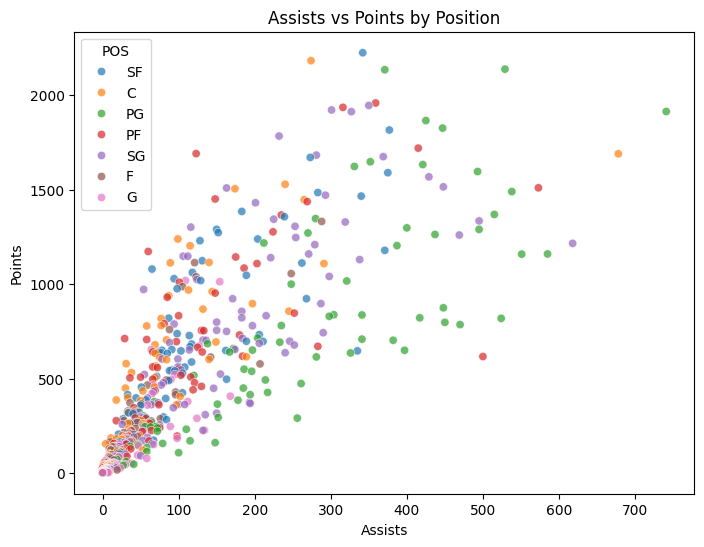

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AST', y='PTS', hue='POS', alpha=0.7)
plt.title('Assists vs Points by Position')
plt.xlabel('Assists')
plt.ylabel('Points')
plt.show()


In [61]:
import pandas as pd


# Basic structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# Summary of each column
for col in df.columns:
    print(f"\n----- {col} -----")
    print("Data Type:", df[col].dtype)
    print("Missing Values:", df[col].isnull().sum())
    
    if df[col].dtype == 'object':
        print("Unique Values:", df[col].nunique())
        print("Top 5 Most Frequent Values:\n", df[col].value_counts().head())
    else:
        print("Min:", df[col].min())
        print("Max:", df[col].max())
        print("Mean:", df[col].mean())
        print("Median:", df[col].median())
        print("Standard Deviation:", df[col].std())


Dataset Shape: (539, 30)

Column Names:
 ['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-']

----- PName -----
Data Type: object
Missing Values: 0
Unique Values: 539
Top 5 Most Frequent Values:
 PName
Sterling Brown             1
Jayson Tatum               1
Joel Embiid                1
Luka Doncic                1
Shai Gilgeous-Alexander    1
Name: count, dtype: int64

----- POS -----
Data Type: object
Missing Values: 5
Unique Values: 7
Top 5 Most Frequent Values:
 POS
SG    96
C     78
SF    77
PG    77
PF    74
Name: count, dtype: int64

----- Team -----
Data Type: object
Missing Values: 0
Unique Values: 30
Top 5 Most Frequent Values:
 Team
DAL    21
POR    21
SAS    21
SAC    20
BKN    20
Name: count, dtype: int64

----- Age -----
Data Type: int64
Missing Values: 0
Min: 19
Max: 42
Mean: 25.97031539888683
Median: 25.0
Standard 